**"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."- Alec Van Nort**

- FAKEID	the ticket buyer's unique ID number
- YXdefect 	"X" indicates the year
	Y3defect=1 for year 2 ticket holders that did not renew for year 3
	Y3defect=0 for year 2 ticket holders that did renew for year 3
	Y2defect=1 for year 1 ticket holders that did not renew for year 2
	Y2defect=0 for year 1 ticket holders that did renew for year 2
- YXGZ	"X" indicates the year, "Z" indicates the game
	e.g. Y2G4=1 for the tickets being used for game 4 in year 2
	e.g. Y2G4=0 for the tickets not being used for game 4 in year 2
- YXprice	"X" indicates the year
	the price paid per ticket in the indicated year
- YEARS	the number of years as a season ticket holder
- BACKER	1=member of the team's "backer" club
	0=not a member of the team's "backer" club
- AGE	age of the ticket buyer (blank=unknown)
- INCOME	income category of the ticket buyer (0=low, 6=high)
- CHILD	1=at least one child age 0-18 in household (blank indicates none or unknown)
- GNDR	1=male, 0=female, blank=unknown
- OWNHOME	1=owns home, 0=does not own home, blank=unknown
- SPORT	purchased appended data
	1=subscribes to a sports magazine, 0=does not subscribe to a sports magazine, blank = unknown
- COMP	purchased appended data
	1=owns a PC (blank indicates does not own a PC or unknown)
- PCTMARR	appended census data at zip code level
	percentage of married heads of household
- HOMEVAL	appended census data at zip code level
	average value of homes in 1000s of dollars

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/Users/alecvannort/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Business and data understanding

** a.) Problem statement **

- K-State Athletics Department are losing season ticket holders and are curious what is making these ticket holders leave. They want to know what they can do to help dissolve this problem from happening.

** b.) Business contexts & significance of the problem**

- If people are backing out of their season ticket, K-State Athletics Department will be bringing in less money for the college. This will impact the bottom line since athletics has such an impact on revenue.

** c.) The business value of the solution **

- If they can predict who is leaving based off of certain variables in the data they will be able to focus their attention on those that have a high probability of canceling their season tickets to try and keep them from canceling. This will therefore keep season ticket sales from declining without atleast trying to intervene. 

# Data processing (ETL):

In [6]:
#Import Data
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [7]:
#Rename columns so they are easier to understand
df.rename(columns={'Y1G5': 'G5', 'Y1G4': 'G4', 'Y1G3': 'G3', 'Y1G2': 'G2', 'Y1G1': 'G1', 'Y1price': 'price', 'Y2defect':'defect'}, inplace=True)
df.head()

,FAKEID,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [8]:
#Fill in all missing data with Null values
df = df.replace(' ', np.nan)
df.head()

,FAKEID,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [9]:
#Find how much information we are missing
df.isnull().sum()

FAKEID        0
defect        0
G5            0
G4            0
G3            0
G2            0
G1            0
price         0
YEARS         0
BACKER        0
AGE        1993
INCOME     1944
CHILD      8634
GNDR        498
OWNHOME    1999
SPORT      4943
COMP       8207
PCTMARR       0
HOMEVAL       0
dtype: int64

In [10]:
#We do not need the information that is missing from my knowledge about renewal of tickets none of them are of significance
df = df.drop(['AGE', 'INCOME', 'CHILD','COMP','SPORT', 'OWNHOME', 'GNDR', 'CHILD'], axis=1)
df.head()

,FAKEID,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,65,194


In [11]:
#Missing data after dropping columns that are not significant
df.isnull().sum()

FAKEID     0
defect     0
G5         0
G4         0
G3         0
G2         0
G1         0
price      0
YEARS      0
BACKER     0
PCTMARR    0
HOMEVAL    0
dtype: int64

# Data visualization

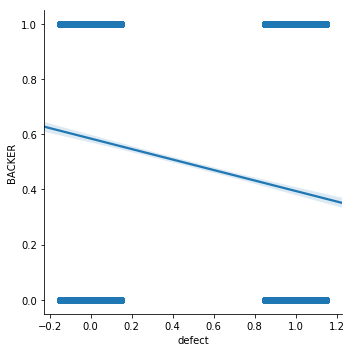

In [12]:
sns.lmplot("defect", "BACKER", df, x_jitter=.15)

- If the season ticket holder is not a "backer" member they are more likely to cancel their season tickets

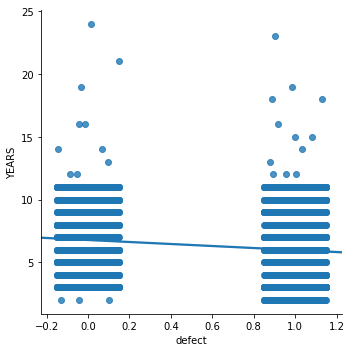

In [13]:
sns.lmplot("defect", "YEARS", df, x_jitter=.15)

- If the season ticket holder is new the more likely they will cancel their ticket

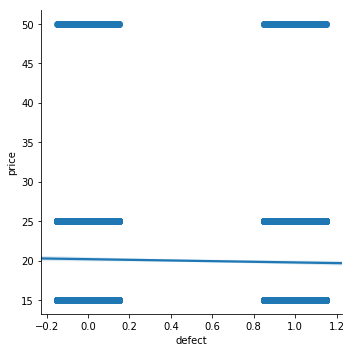

In [14]:
sns.lmplot("defect", "price", df, x_jitter=.15)

- Price does not seem to have a huge impact on if the season ticket will cancel or not

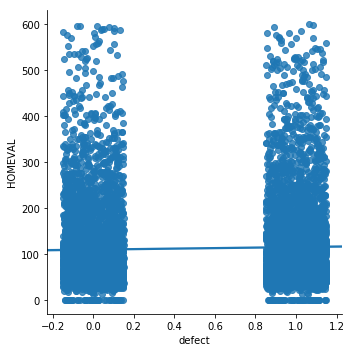

In [15]:
sns.lmplot("defect", "HOMEVAL", df, x_jitter=.15)

- Not a huge impact on home value and if a season ticket holder will cancel their tickets

# Exploratory data analysis

In [17]:
from scipy import stats

In [18]:
defect_yes_back = df[df['defect'] == 1]['BACKER']
defect_no_back = df[df['defect'] == 0]['BACKER']

two_sample = stats.ttest_ind(defect_yes_back, defect_no_back)

print "The t-statistics is %.3f and the p-value is %.3f." % two_sample

The t-statistics is -18.569 and the p-value is 0.000.


defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

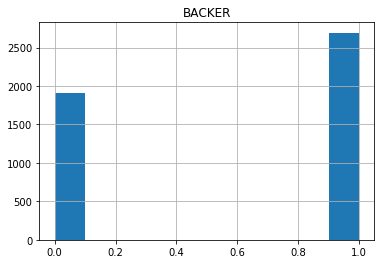

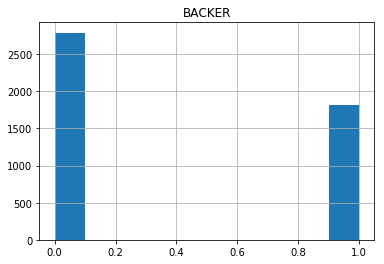

In [20]:
df.groupby('defect').hist('BACKER')

- From the statistical testing and the graphs that I made above it shows that those who are not backer members tend to cancel their tickets rather than those who are backer members.

In [19]:
defect_yes_year = df[df['defect'] == 1]['YEARS']
defect_no_year = df[df['defect'] == 0]['YEARS']

two_sample = stats.ttest_ind(defect_yes_year, defect_no_year)

print "The t-statistics is %.3f and the p-value is %.3f." % two_sample

The t-statistics is -13.483 and the p-value is 0.000.


defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

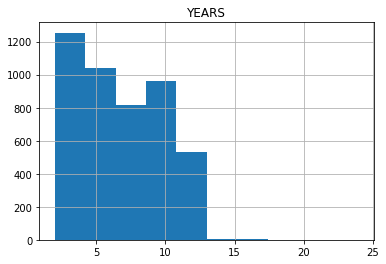

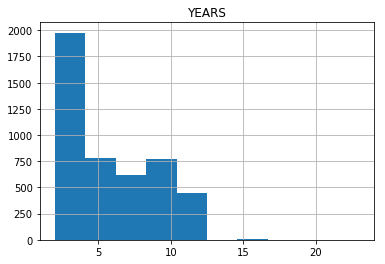

In [21]:
df.groupby('defect').hist('YEARS')

- From the statistical testing and the graphs that I made above it shows that those who are new season ticket holders tend to cancel their tickets more likely than those who have had season tickets longer.

In [22]:
defect_yes_price = df[df['defect'] == 1]['price']
defect_no_price = df[df['defect'] == 0]['price']

two_sample = stats.ttest_ind(defect_yes_price, defect_no_price)

print "The t-statistics is %.3f and the p-value is %.3f." % two_sample

The t-statistics is -2.256 and the p-value is 0.024.


defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

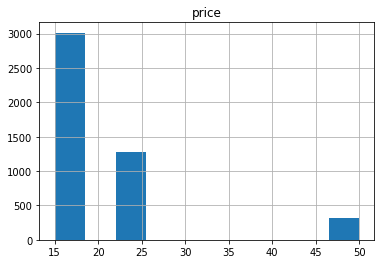

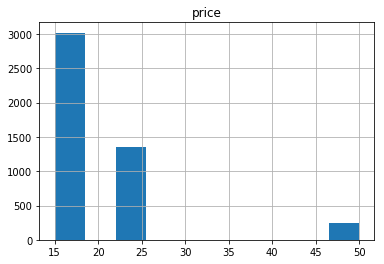

In [23]:
df.groupby('defect').hist('price')

- From the statistical testing and the graphs that I made above it shows that price does not usually play a huge part in whether or not an individual will cancel their tickets.

In [24]:
df.corr()

,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,PCTMARR,HOMEVAL
defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023869,0.029722
G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.008064,-0.000382
G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,0.001259,0.001030
G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.006574,0.001812
G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.019234,-0.013760
G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.024756,-0.014693
price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.032558,-0.064727
PCTMARR,-0.023869,0.008064,0.001259,-0.006574,0.019234,0.024756,0.008032,0.023691,0.032558,1.000000,0.046570


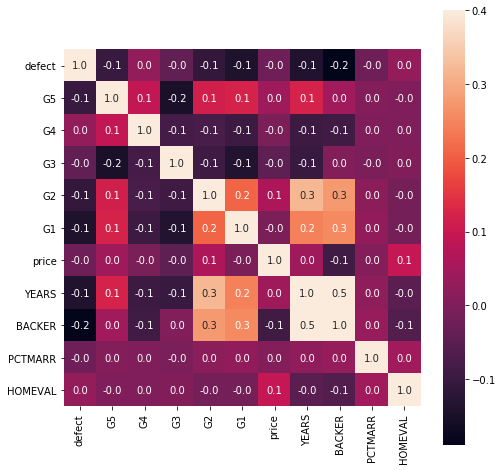

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.4, square=True, annot=True, fmt=".1f")

- From the correlation heat map above you can tell that their is a correlation between "BACKER" "YEARS" and some of the games.

# Model Development - Building and Evaluation

#### I built 5 models and justified which model was best based off of the AUC score given. They follow in this order: Decision Tree Model, KNN Model, K-Best Model, RFE Model and XGBoost Model.

Decision Tree Model - Building model

In [115]:
y = df['defect']
X = df[['BACKER', 'YEARS', 'price']]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.596021699819
[[944 419]
 [698 704]]
             precision    recall  f1-score   support

          0       0.57      0.69      0.63      1363
          1       0.63      0.50      0.56      1402

avg / total       0.60      0.60      0.59      2765

0.59736483778


KNN - Building model

Text(0,0.5,u'accuracy')

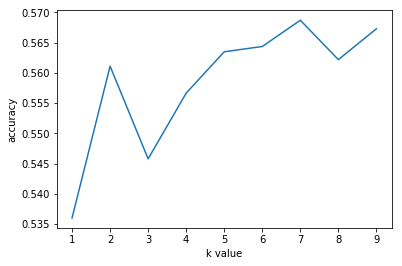

In [119]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [120]:
X = df.drop(['defect', 'FAKEID'], axis=1)
y = df['defect']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [122]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.523688969259
[[744 619]
 [698 704]]
             precision    recall  f1-score   support

          0       0.52      0.55      0.53      1363
          1       0.53      0.50      0.52      1402

avg / total       0.52      0.52      0.52      2765

0.523997266247


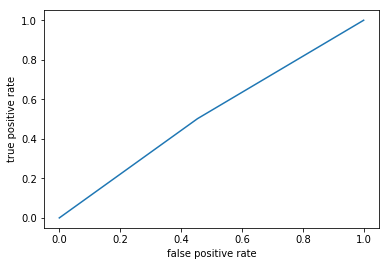

False-positive rate: [ 0.          0.45414527  1.        ]
True-positive rate:  [ 0.         0.5021398  1.       ]
AUC score:  0.523997266247


In [123]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,knn.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, knn.predict(X_test))

K-Best - Building model

In [124]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[  8   1 203]
 [  3   1  68]
 [ 11   1  38]
 ..., 
 [  6   0  95]
 [  7   1  37]
 [  7   1 344]]


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.545388788427
--------------------------------------------------------
[[834 529]
 [728 674]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.61      0.57      1363
          1       0.56      0.48      0.52      1402

avg / total       0.55      0.55      0.54      2765

--------------------------------------------------------
0.54631367201


RFE - Building model

In [126]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False  True False False]
[1 3 1 2 1 5 4 1 6 7]


In [127]:
#To find out what variables are the "best" attributes in determining renewal
X.head(1)

,G5,G4,G3,G2,G1,price,YEARS,BACKER,PCTMARR,HOMEVAL
0,0,0,1,1,1,15,8,1,77,203


In [128]:
X_logistic = df[['G5', 'G3', 'G1', 'BACKER']]
print X_logistic.head()

   G5  G3  G1  BACKER
0   0   1   1       1
1   0   1   1       1
2   1   0   1       1
3   1   1   1       0
4   0   1   0       0


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.59746835443
[[880 483]
 [630 772]]
             precision    recall  f1-score   support

          0       0.58      0.65      0.61      1363
          1       0.62      0.55      0.58      1402

avg / total       0.60      0.60      0.60      2765

0.59813828479


XGBoost model - Building model

In [138]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
X = df.drop(['defect', 'FAKEID'], axis=1)
Y = df['defect']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.05%


# Model Deployment & Prepare Entry Data

In [131]:
#Import validation data
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [132]:
#Rename columns to match original built model above
df2.rename(columns={'Y2G5': 'G5', 'Y2G4': 'G4', 'Y2G3': 'G3', 'Y2G2': 'G2', 'Y2G1': 'G1', 'Y2price': 'price', 'Y3defect':'defect'}, inplace=True)
df2.head()

,FAKEID,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [133]:
#Drop columns that we dropped above to build model
df2 = df2.drop(['AGE', 'INCOME', 'CHILD','COMP','SPORT', 'OWNHOME', 'GNDR', 'CHILD'], axis=1)
df2.head()

,FAKEID,defect,G5,G4,G3,G2,G1,price,YEARS,BACKER,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,65,110


In [147]:
#load data that we want
validation = df2.drop(['defect', 'FAKEID'], axis=1)
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 10 columns):
G5         9542 non-null int64
G4         9542 non-null int64
G3         9542 non-null int64
G2         9542 non-null int64
G1         9542 non-null int64
price      9542 non-null int64
YEARS      9542 non-null int64
BACKER     9542 non-null int64
PCTMARR    9542 non-null int64
HOMEVAL    9542 non-null int64
dtypes: int64(10)
memory usage: 745.5 KB


In [144]:
#So we can join the two later for our submission
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [149]:
# applying the XGBoost model to validation dataset
output_scoring =  model.predict(validation)

# generating probability for defect for each fan
probs = model.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

In [150]:
# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

# Final analysis & storytelling

- The most important data that you can use to tell if a member will continue to buy tickets each year is the the duration of years they have been a member and if they are a part of the backer club. If your ticket holder has a higher number of years they will most likely stay and they wont need much attention. Also, if someone is a backer member they are also more likely to keep their season tickets. 

- On the other side of things if someone has not had their tickets for that many consecutive years they will probably need more attention so they will keep their tickets. Also, anyone who is not a backer member will also need a lot more attention because they are way more likely to not renew their tickets. 

- If we were given some data about season records and on if it was a winning season or a losing season we can see if that has any correlation to when people defect their tickets. Maybe incorporating that into the data set would be a great addition for your prediction.